# Linear Regression


Defining a linear regression in simple terms, its the approximation of a linear model used to describe the relationship betweeen two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states".

When more than one independent variable is present the process is called multiple linear regression. When multiple dependent variables are predicted the process is known as multivariate linear regression.

The very known equation of a simple linear model is

Y=aX+b
 
Where Y is the dependent variable and X is the independent variable, and a and b being the parameters we adjust. a is known as "slope" or "gradient" and b as "intercept". You can interpret this equation as Y being a function of X, or Y being dependent of X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable axis.

Let's first import packages:

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
## defining the independent variable:
X = np.arange(0.0, 0.5, 0.1)
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4])

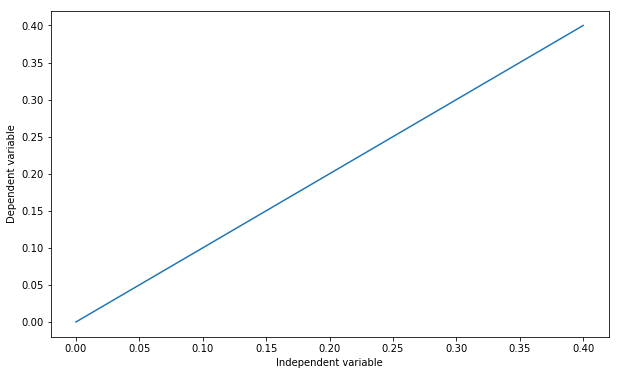

In [8]:
##You can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y = a*X + b
plt.plot(X,Y)
plt.ylabel('Dependent variable')
plt.xlabel('Independent variable')
plt.show()

# Linear Regression with Tensorflow 

A simple example of a linear function can help us understand the basic mechanism behind TensorFlow. 
For the first part we will generate random data points and define a linear relation, we'll use TensorFlow to adjust and get the right parameters.

In [29]:
x_data = np.random.randn(100).astype(np.float32)

In [30]:
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y +np.random.normal(loc =0.0, scale = 0.1))(y_data)
print(y_data)

[ 5.19979697  0.01705423 -0.30363676  1.9732751   1.37404468  1.76460285
  0.62378653  8.7332745   0.99501907 -1.28549385  2.60890888  2.31856226
  4.46415366  3.21126902  6.35533425  2.69623832  0.49601754 -1.75601622
  4.2250374   2.0595566   4.26204718  0.04572728  6.31870385 -2.20697676
  4.40306866 -1.50673307  5.5622784  -4.59947506 -1.34984755  5.60564663
  0.77996175  0.86542284 -4.83571051  2.59902204  6.9620677   3.86678403
  2.49912519  0.89811609  1.48254806  0.09231017  2.64380748  1.99907528
  1.2027835   0.84273173 -0.99752893  3.0594473   1.67235129  3.09111628
  9.42390631 -2.3797756  -1.01548833  1.78192435 -0.32301167  4.43162199
  2.85747468 -0.02439302  1.92157839  2.02276098  1.61382999  5.92586852
  4.29863885  0.45597616 -2.25446832  2.88595052  4.10223687  0.90675699
  1.37168436  5.40310243  1.4070912   5.34848669  2.32146446 -2.49301381
  4.05751573  4.47738042  1.13810123 -1.25364365  1.78381259 -5.04353832
  5.96702913  4.51529689  8.09828955  3.66155064  0

In [31]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)

In [32]:
y = a*x_data + b

In a linear regression, we minimize the squared error of the equation that we want to adjust minus the target values (the data that we have), so we define the equation to be minimized as loss.

To find Loss's value, we use tf.reduce_mean(). This function finds the mean of a multidimensional tensor, and the result can have a diferent dimension.

In [33]:
loss = tf.reduce_mean(tf.square(y - y_data))

Then, we define the optimizer method. Here we will use a simple gradient descent with a learning rate of 0.5: 

Now we will define the training method of our graph, what method we will use for minimize the loss? We will use the tf.train.GradientDescentOptimizer.
.minimize()__ will minimize the error function of our optimizer, resulting in a better model.

In [34]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [35]:
## dont foregt to initialize the variable before executing a graph
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [36]:
## now we are ready to start the optimization and the graph:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 ==0:
        print(step, evals)
        train_data.append(evals)

0 [2.8777623, 2.0559237]
5 [2.9957519, 1.9952593]
10 [2.9957528, 1.995259]
15 [2.9957528, 1.9952589]
20 [2.9957528, 1.995259]
25 [2.9957528, 1.9952589]
30 [2.9957528, 1.995259]
35 [2.9957528, 1.9952589]
40 [2.9957528, 1.995259]
45 [2.9957528, 1.9952589]
50 [2.9957528, 1.995259]
55 [2.9957528, 1.9952589]
60 [2.9957528, 1.995259]
65 [2.9957528, 1.9952589]
70 [2.9957528, 1.995259]
75 [2.9957528, 1.9952589]
80 [2.9957528, 1.995259]
85 [2.9957528, 1.9952589]
90 [2.9957528, 1.995259]
95 [2.9957528, 1.9952589]


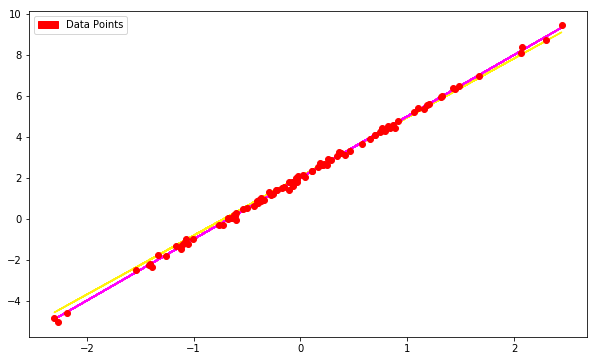

In [37]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0/ len(train_data)
    cg -= 1.0/len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x +b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color = (cr, cg, cb))
    
plt.plot(x_data, y_data,  'ro')
green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()